# Задание 2. Персептрон

Написать и обучить многослойный персептрон для аппроксимации функции косинуса. Выбор количества слоев и нейронов, а также функций активации остается на усмотрение студента. Отобразить график аппроксимации для тестовой выборки (на одной диаграмме реальный косинус и поверх него то, что выдала нейросеть) и график обучения (значение функции стоимости с каждой эпохой). Посчитать $R^2$.

In [1]:
import numpy as np

## Data

In [2]:
x_train = np.arange(-2*np.pi, 2*np.pi, 0.01).reshape((-1, 1))
y_train = np.cos(x_train).reshape((-1, 1))

x_test = np.arange(-4*np.pi, 4*np.pi, 0.01).reshape((-1, 1))
y_test = np.cos(x_test).reshape((-1, 1))

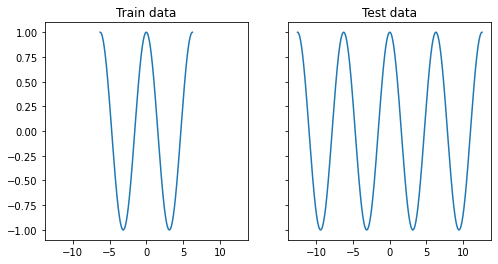

In [3]:
from visualization import data_visualization
data_visualization(x_train, y_train, x_test, y_test)

## Modelling

In [4]:
HIDDEN_LAYER_SIZE = 30
EPOCHS_NUM = 2500

In [5]:
from layers import FullyConnectedLayer, SigmoidLayer
from optimizers import Adam, L2
from model import Perceptron
from metrics import MSE


model = Perceptron(loss=MSE)
model.add_layer(FullyConnectedLayer(1, HIDDEN_LAYER_SIZE))
model.add_layer(SigmoidLayer())
model.add_layer(FullyConnectedLayer(HIDDEN_LAYER_SIZE, HIDDEN_LAYER_SIZE))
model.add_layer(SigmoidLayer())
model.add_layer(FullyConnectedLayer(HIDDEN_LAYER_SIZE, 10))
model.add_layer(SigmoidLayer())
model.add_layer(FullyConnectedLayer(10, 1))
model.add_layer(SigmoidLayer())


loss, best_weights = model.fit(
    x_train, y_train, lr=1e-3, reg=None, optimizer=Adam(model), num_epochs=EPOCHS_NUM)


model.upload_weights(best_weights)
predict = -model.forward(x_test % (2*np.pi)-np.pi)

0 Loss:  10479523.39144294
250 Loss:  391.0800100528779
500 Loss:  288.64079675617415
750 Loss:  582.613199005
1000 Loss:  1206.0976854617397
1250 Loss:  1277.309853296594
1500 Loss:  635.3052259142241
1750 Loss:  235.99981256136635
2000 Loss:  83.50328533568228
2250 Loss:  30.54125823757738
2500 Loss:  12.479206784486014
2750 Loss:  5.414583316084231
3000 Loss:  2.3667613133738574
3250 Loss:  1.0775692709509916
3500 Loss:  0.5728044506990612
3750 Loss:  0.40203979340700474
4000 Loss:  0.3260100302521289
4250 Loss:  0.25733259055073876
4500 Loss:  0.2007706461498729
4750 Loss:  0.15671706191447474


## Results

Посчитаем $R^2$ метрику

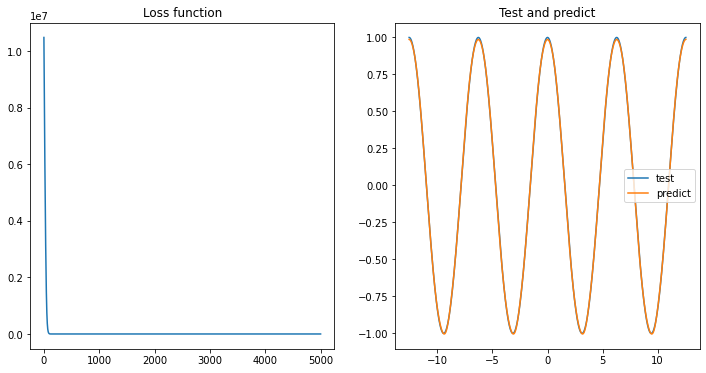

In [6]:
from visualization import model_visualization
model_visualization(loss, x_test, y_test, predict)

In [7]:
from metrics import R2
print(R2(np.squeeze(y_test), np.squeeze(predict)))

0.9999283462086973
